In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import warnings
import pickle
warnings.filterwarnings('ignore')

# Input Data

In [88]:
df = pd.read_csv('Dataset1_Customer_Churn.csv')
df

,CustomerId,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
0,15634602,Female,42,619,101348.88,1,1
1,15647311,Female,41,608,112542.58,0,0
2,15619304,Female,42,502,113931.57,1,1
3,15701354,Female,39,699,93826.63,0,0
4,15737888,Female,43,850,79084.10,1,0
...,...,...,...,...,...,...,...
9995,15606229,Male,39,771,96270.64,1,0
9996,15569892,Male,35,516,101699.77,1,0
9997,15584532,Female,36,709,42085.58,0,1
9998,15682355,Male,42,772,92888.52,1,1


In [89]:
df.isnull().sum()

CustomerId         0
Gender             0
Age                0
CreditScore        0
EstimatedSalary    0
HasCrCard          0
Exited             0
dtype: int64

In [90]:
df.isna().sum()

CustomerId         0
Gender             0
Age                0
CreditScore        0
EstimatedSalary    0
HasCrCard          0
Exited             0
dtype: int64

In [91]:
df.select_dtypes(np.number).columns

Index(['CustomerId', 'Age', 'CreditScore', 'EstimatedSalary', 'HasCrCard',
       'Exited'],
      dtype='object')

In [92]:
df.select_dtypes('object').columns

Index(['Gender'], dtype='object')

In [93]:
df.nunique()

CustomerId         10000
Gender                 2
Age                   70
CreditScore          460
EstimatedSalary     9999
HasCrCard              2
Exited                 2
dtype: int64

In [94]:
len(df[df.duplicated()])

0

In [95]:
df.describe()

,CustomerId,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.569094e+07,38.921800,650.528800,100090.239881,0.70550,0.203700
std,7.193619e+04,10.487806,96.653299,57510.492818,0.45584,0.402769
min,1.556570e+07,18.000000,350.000000,11.580000,0.00000,0.000000
25%,1.562853e+07,32.000000,584.000000,51002.110000,0.00000,0.000000
50%,1.569074e+07,37.000000,652.000000,100193.915000,1.00000,0.000000
75%,1.575323e+07,44.000000,718.000000,149388.247500,1.00000,0.000000
max,1.581569e+07,92.000000,850.000000,199992.480000,1.00000,1.000000




*  HasCrCard mengandung kategorikal data. Sebanyak 25% dari nasabah tidak memiliki kartu kredit.
*   



In [96]:
df.describe(include='object')

,Gender
count,10000
unique,2
top,Male
freq,5457


Target kita adalah untuk mengidentifikasi seorang nasabah apakah dia akan berhenti menjadi nasabah. Variabel 'Exited' sebagai target yang mengandung tipe data kategorikal, dimana 0 artinya tidak berhenti dan 1 artinya berhenti. Prediktornya adalah variabel 'Age', CreditScore', 'EstimatedSalary', dan 'HasCrCard'. Variabel 'CustomerId' tidak relevan terhadap model sehingga kita abaikan.

In [97]:
df.drop(['CustomerId'], axis=1, inplace=True)

**Label Encoder untuk Gender**

0 = Female ; 1 = Male

In [98]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
0,0,42,619,101348.88,1,1
1,0,41,608,112542.58,0,0
2,0,42,502,113931.57,1,1
3,0,39,699,93826.63,0,0
4,0,43,850,79084.10,1,0
...,...,...,...,...,...,...
9995,1,39,771,96270.64,1,0
9996,1,35,516,101699.77,1,0
9997,0,36,709,42085.58,0,1
9998,1,42,772,92888.52,1,1


Kategorikal data =

- Gender
- HasCrCard

Numerikal data =
- Age
- CreditScore
- EstimatedSalary

# EDA

## Status Target Data

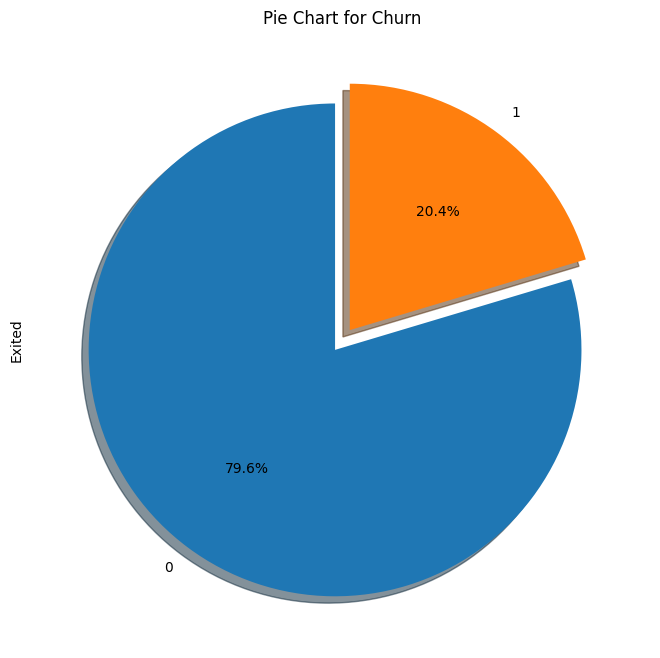

In [99]:
# Let's see how our target data looks like
df['Exited'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', startangle=90, shadow=True, figsize=(10,8))
plt.title('Pie Chart for Churn')
plt.show()

Dapat disimpulkan bahwa sekitar 20% nasabah telah menutup akunnya.

Adanya ketimpangan (skewed) antara total No Exited dan Exited. Proporsi minority class (Exited) sebesar 20.37%, yang dimana masuk ke dalam kategori mild imbalanced data. Maka kita dapat melakukan teknik SMOTE.

## Hubungan Kategorikal Data terhadap Target

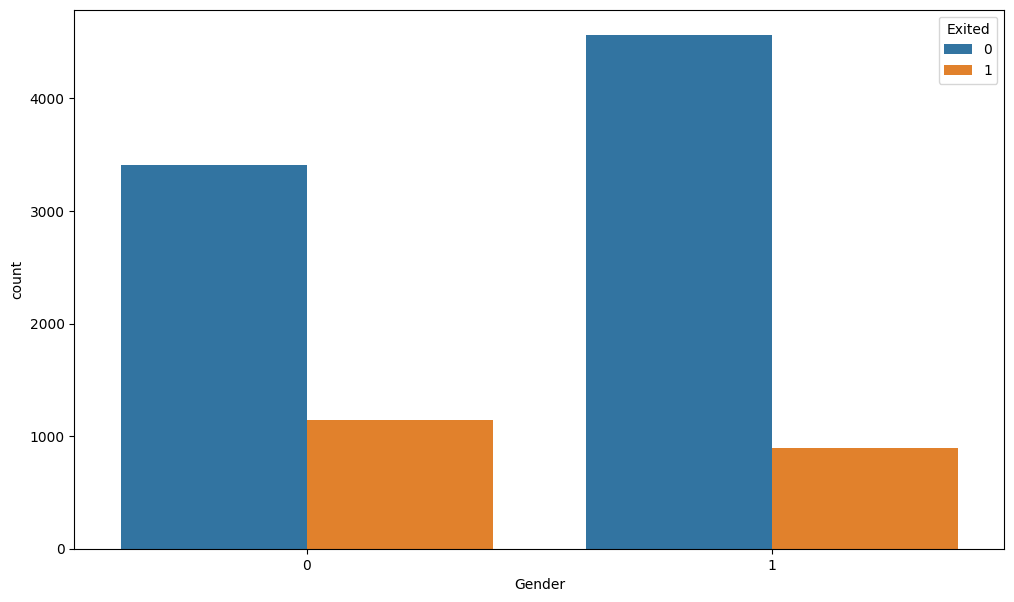

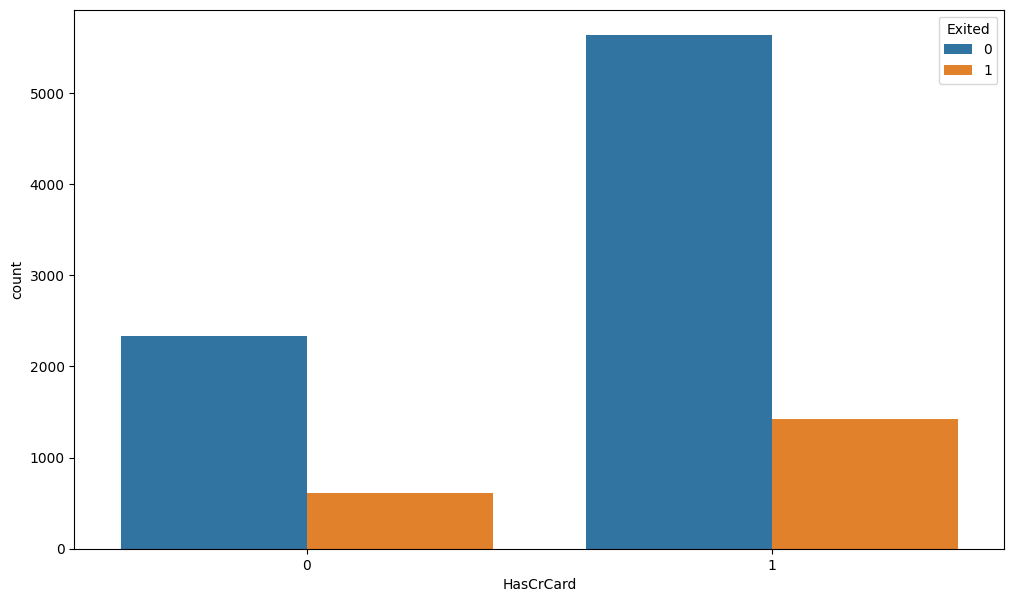

In [100]:
for i, predictor in enumerate(df.drop(columns=['Age', 'CreditScore', 'EstimatedSalary', 'Exited'])):
  plt.figure(i)
  sns.countplot(data=df, x=predictor, hue='Exited')

## Hubungan Numerikal Data terhadap Target

**1.) Age vs Exited**

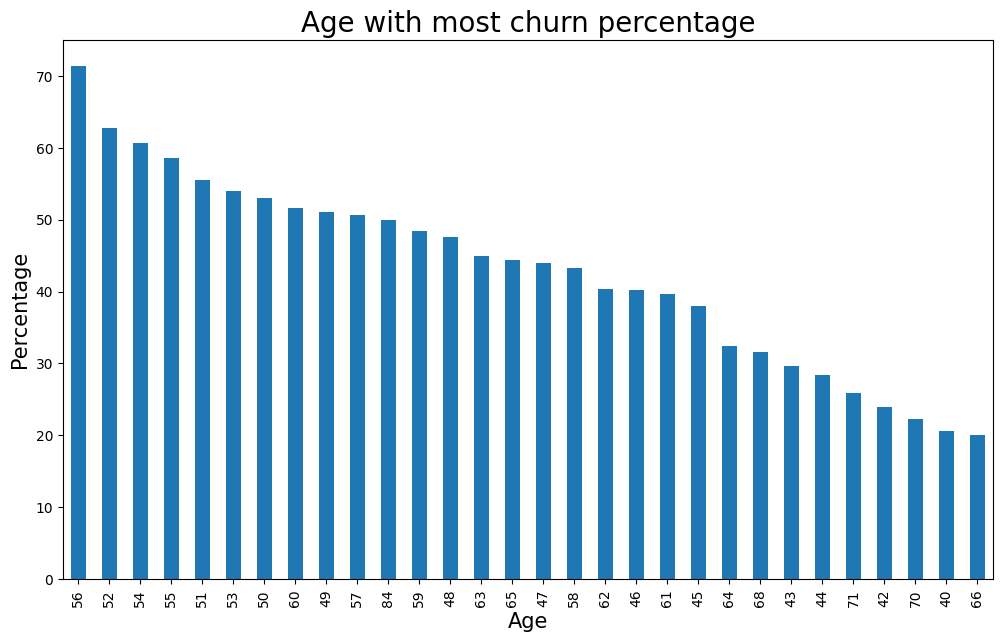

In [101]:
plt.rcParams['figure.figsize'] = (12,7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['Age'])['Exited'].mean())*100).sort_values(ascending=False).head(30).plot.bar()
plt.title('Age with most churn percentage', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.show()

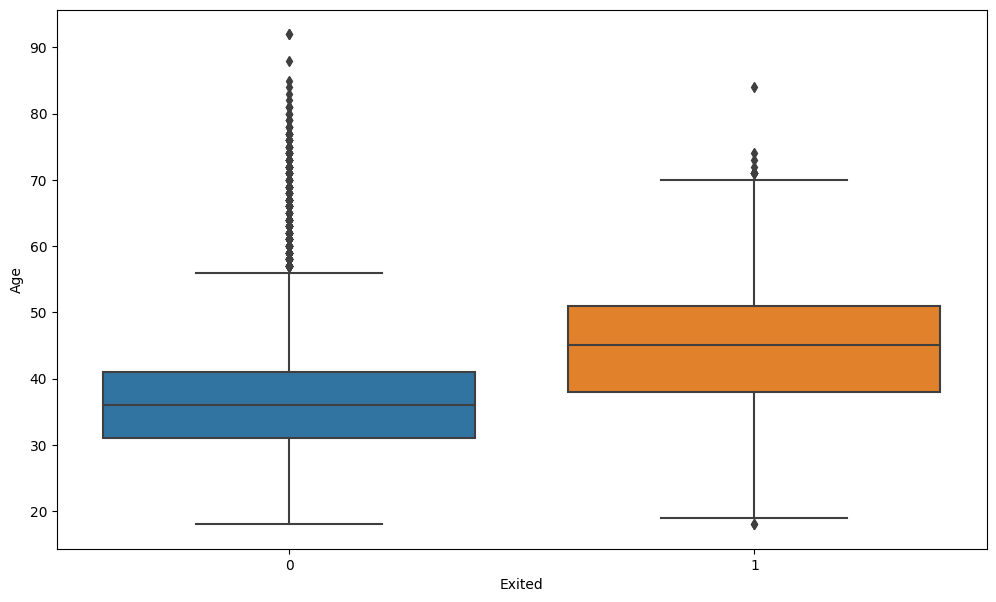

In [102]:
sns.boxplot( x = 'Exited',y = 'Age', data = df )
plt.show()

**2.) CreditScore vs Exited**

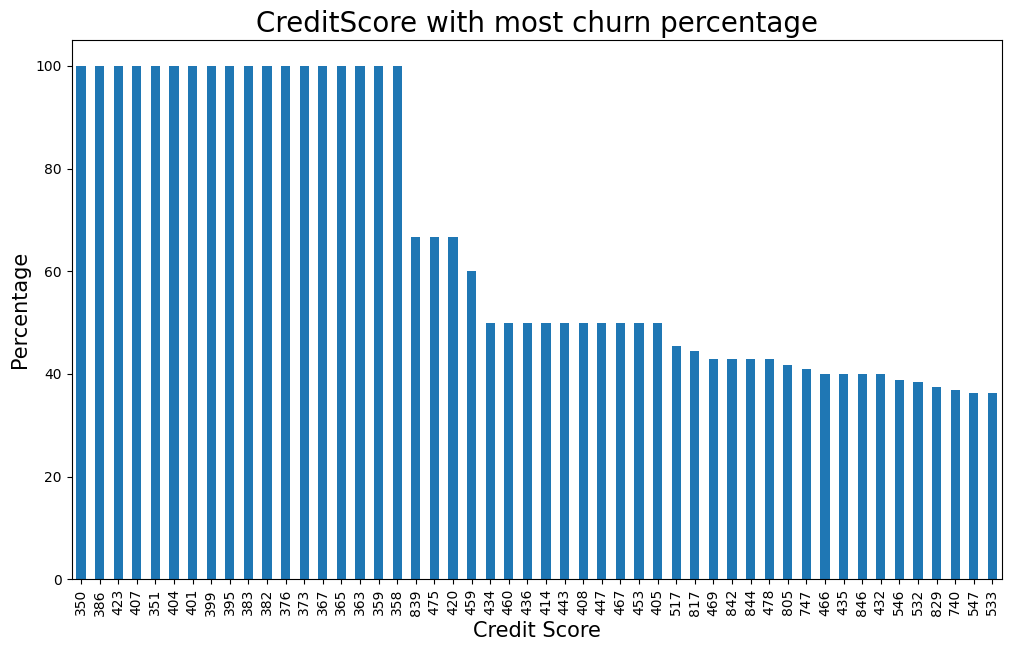

In [103]:
plt.rcParams['figure.figsize'] = (12,7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['CreditScore'])['Exited'].mean())*100).sort_values(ascending=False).head(50).plot.bar()
plt.title('CreditScore with most churn percentage', fontsize=20)
plt.xlabel('Credit Score', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.show()

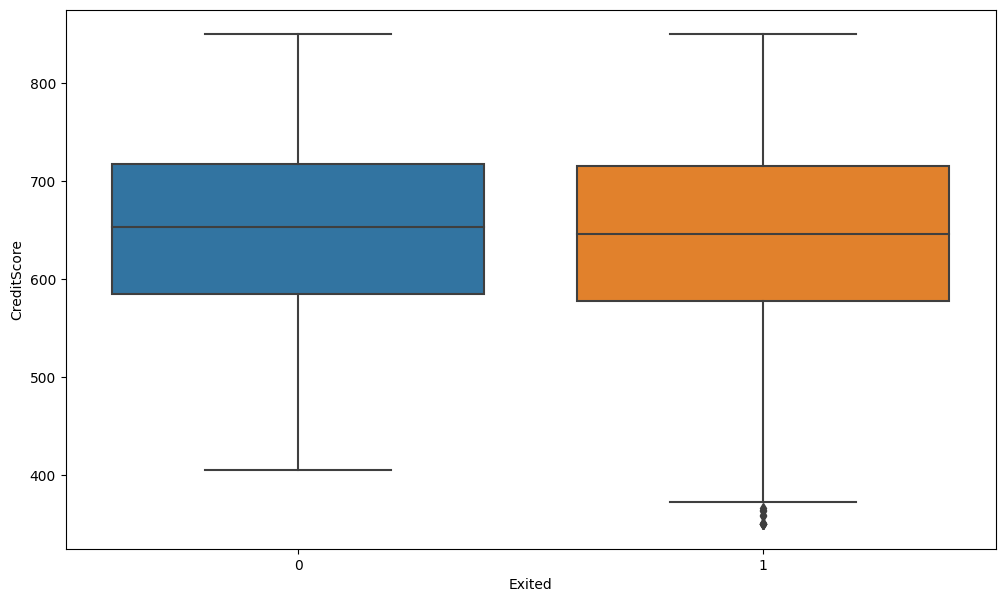

In [104]:
sns.boxplot( x = 'Exited',y = 'CreditScore', data = df )
plt.show()

3.) EstimatedSalary vs Exited

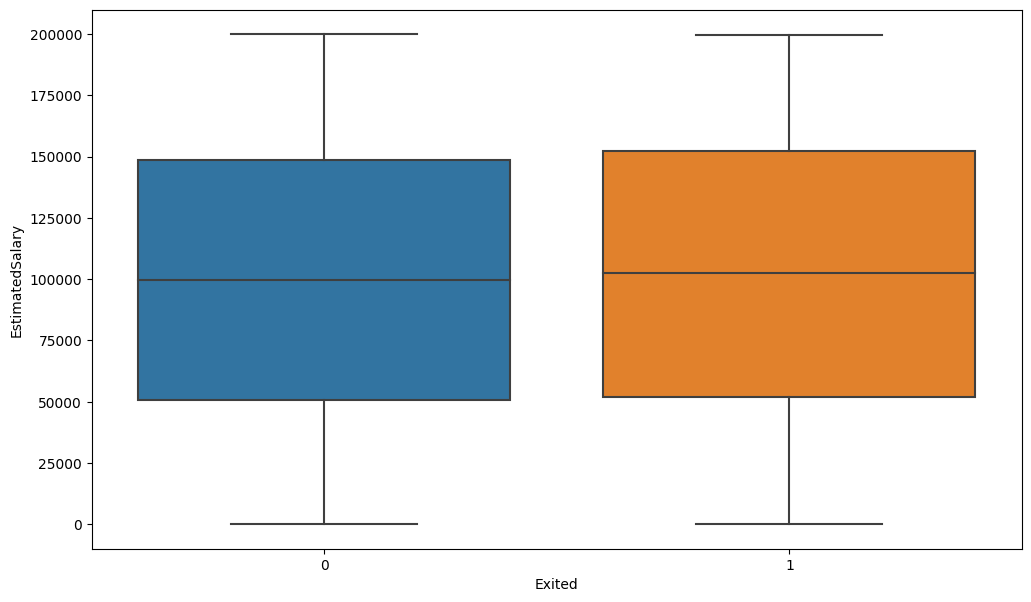

In [105]:
sns.boxplot( x = 'Exited',y = 'EstimatedSalary', data = df )
plt.show()

## Hubungan Korelasi antar Feature

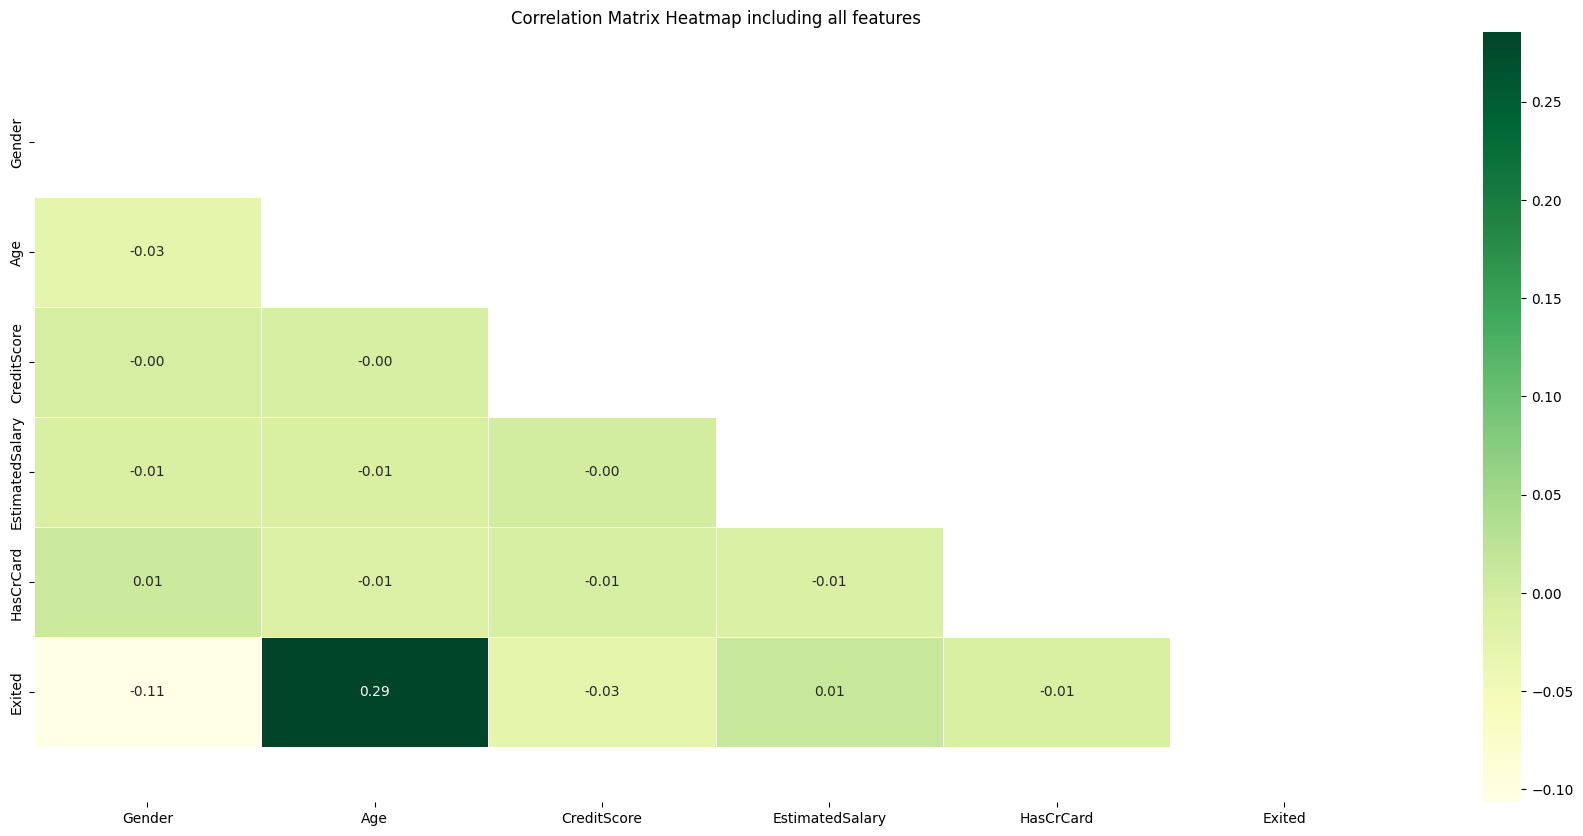

In [106]:
corr_matrix = df.corr()  # Correlation Matrix

# Mask for Heatmap
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(corr_matrix)] = True

# Correlation Matrix Heatmap including all features
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_title("Correlation Matrix Heatmap including all features");

# Feature Engineering

In [107]:
df1 = df.copy()

In [108]:
df1['CrdScoreGivenAge'] = df1['CreditScore'] / df1['Age']

In [109]:
df1

,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited,CrdScoreGivenAge
0,0,42,619,101348.88,1,1,14.738095
1,0,41,608,112542.58,0,0,14.829268
2,0,42,502,113931.57,1,1,11.952381
3,0,39,699,93826.63,0,0,17.923077
4,0,43,850,79084.10,1,0,19.767442
...,...,...,...,...,...,...,...
9995,1,39,771,96270.64,1,0,19.769231
9996,1,35,516,101699.77,1,0,14.742857
9997,0,36,709,42085.58,0,1,19.694444
9998,1,42,772,92888.52,1,1,18.380952


<AxesSubplot: >

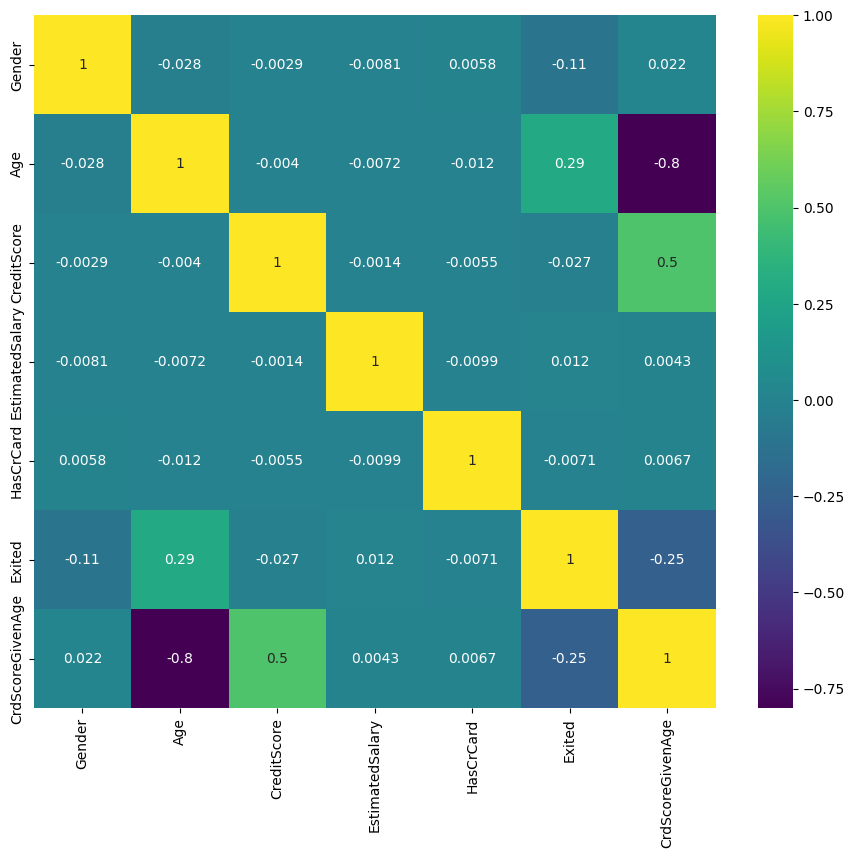

In [110]:
cormat = df1.corr()
plt.figure(figsize=(11,9))
sns.heatmap(cormat, annot=True, cmap='viridis')

# Train-Test Split

In [111]:
X1 = df1.drop('Exited', axis=1)
y1 = df1['Exited']

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.35, random_state=123, stratify=y1)

In [114]:
y1.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Feature Scaling

In [115]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [116]:
X1_train = ss.fit_transform(X1_train)
X1_test = ss.fit_transform(X1_test)

# Membangun Model

## KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [118]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': np.arange(1,100)}

In [119]:
knnclassifier = GridSearchCV(knn, parameters, cv=10)

In [120]:
knnclassifier.fit(X1_train, y1_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [121]:
print(knnclassifier.best_score_)
print(knnclassifier.best_params_)

0.8073846153846154
{'n_neighbors': 31}


In [122]:
rel = pd.DataFrame(knnclassifier.cv_results_)
rel.sort_values(by=['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
30,0.006756,0.002562,0.029720,0.000597,31,{'n_neighbors': 31},0.812308,0.809231,0.816923,0.809231,0.820000,0.807692,0.801538,0.798462,0.806154,0.792308,0.807385,0.007899,1
19,0.006775,0.001162,0.029621,0.002851,20,{'n_neighbors': 20},0.815385,0.804615,0.826154,0.806154,0.812308,0.807692,0.803077,0.786154,0.804615,0.800000,0.806615,0.009876,2
29,0.005685,0.000644,0.031617,0.003058,30,{'n_neighbors': 30},0.813846,0.804615,0.812308,0.810769,0.823077,0.806154,0.800000,0.793846,0.809231,0.792308,0.806615,0.008919,2
27,0.005898,0.000313,0.031156,0.003300,28,{'n_neighbors': 28},0.810769,0.809231,0.812308,0.810769,0.823077,0.806154,0.795385,0.796923,0.807692,0.792308,0.806462,0.008779,4
23,0.006373,0.000809,0.031497,0.002111,24,{'n_neighbors': 24},0.818462,0.801538,0.815385,0.800000,0.823077,0.809231,0.800000,0.792308,0.806154,0.798462,0.806462,0.009378,4


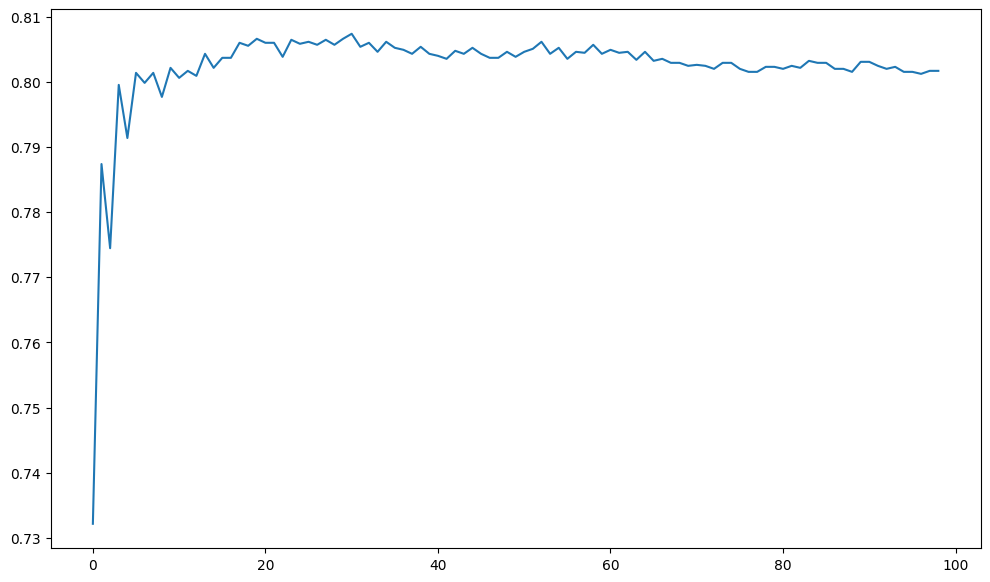

In [123]:
plt.plot(rel['mean_test_score'])

In [124]:
# knnclassifier.fit(X1_test, y1_test)

In [125]:
# print(knnclassifier.best_score_)
# print(knnclassifier.best_params_)

In [126]:
# rel1 = pd.DataFrame(knnclassifier.cv_results_)
# rel1.sort_values(by=['rank_test_score']).head()

In [127]:
# plt.plot(rel1['mean_test_score'])

In [128]:
y1_pred_knn = knnclassifier.predict(X1_test)

In [129]:
y1_pred_knn

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### KNN Evaluation

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [131]:
print('KNN Score')
print('Accuracy: {:.2f}'.format(accuracy_score(y1_test, y1_pred_knn)))
print('Precision: {:.2f}'.format(precision_score(y1_test, y1_pred_knn)))
print('Recall: {:.2f}'.format(recall_score(y1_test, y1_pred_knn)))
print('f1: {:.2f}'.format(f1_score(y1_test, y1_pred_knn)))

y1_predProba_knn = knnclassifier.predict_proba(X1_test)[::,-1]
print('ROC AUC: {:.2f}'.format(roc_auc_score(y1_test, y1_predProba_knn)))

KNN Score
Accuracy: 0.81
Precision: 0.57
Recall: 0.18
f1: 0.27
ROC AUC: 0.72


## Logistics Regression

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
log1 = LogisticRegression()
log1.fit(X1_train, y1_train)
y1_pred_log = log1.predict(X1_test)

### Logistic Regression Evaluation

In [134]:
print('Logistic Regression Score')
print('Accuracy: {:.2f}'.format(accuracy_score(y1_test, y1_pred_log)))
print('Precision: {:.2f}'.format(precision_score(y1_test, y1_pred_log)))
print('Recall: {:.2f}'.format(recall_score(y1_test, y1_pred_log)))
print('f1: {:.2f}'.format(f1_score(y1_test, y1_pred_log)))

y1_predProba_log = log1.predict_proba(X1_test)[::,-1]
print('ROC AUC: {:.2f}'.format(roc_auc_score(y1_test, y1_predProba_log)))

Logistic Regression Score
Accuracy: 0.79
Precision: 0.34
Recall: 0.05
f1: 0.08
ROC AUC: 0.72


## SVC

In [135]:
from sklearn.svm import SVC

In [136]:
svc1 = SVC(probability=True)
svc1.fit(X1_train, y1_train)
y1_pred_svc = svc1.predict(X1_test)

### SVC Evaluation

In [137]:
print('SVC Score')
print('Accuracy: {:.2f}'.format(accuracy_score(y1_test, y1_pred_svc)))
print('Precision: {:.2f}'.format(precision_score(y1_test, y1_pred_svc)))
print('Recall: {:.2f}'.format(recall_score(y1_test, y1_pred_svc)))
print('f1: {:.2f}'.format(f1_score(y1_test, y1_pred_svc)))

y1_predProba_svc = svc1.predict_proba(X1_test)[::,-1]
print('ROC AUC: {:.2f}'.format(roc_auc_score(y1_test, y1_pred_svc)))

SVC Score
Accuracy: 0.80
Precision: 0.59
Recall: 0.13
f1: 0.22
ROC AUC: 0.55


## Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
dectree1 = DecisionTreeClassifier()
dectree1.fit(X1_train, y1_train)
y1_pred_dectree = dectree1.predict(X1_test)

In [140]:
y1_predProba_dectree = dectree1.predict_proba(X1_test)[::,-1]
y1_predProba_dectree

array([1., 0., 1., ..., 0., 0., 0.])

### Decision Tree Evaluation

In [141]:
print('Decision Tree Score')
print('Accuracy: {:.2f}'.format(accuracy_score(y1_test, y1_pred_dectree)))
print('Precision: {:.2f}'.format(precision_score(y1_test, y1_pred_dectree)))
print('Recall: {:.2f}'.format(recall_score(y1_test, y1_pred_dectree)))
print('f1: {:.2f}'.format(f1_score(y1_test, y1_pred_dectree)))

print('ROC AUC: {:.2f}'.format(roc_auc_score(y1_test, y1_predProba_dectree)))

Decision Tree Score
Accuracy: 0.73
Precision: 0.33
Recall: 0.34
f1: 0.33
ROC AUC: 0.58


## Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf1 = RandomForestClassifier()
rf1.fit(X1_train, y1_train)
y1_pred_rf = rf1.predict(X1_test)

In [144]:
y1_predProba_rf = rf1.predict_proba(X1_test)[::,-1]
y1_predProba_rf

array([0.27, 0.  , 0.58, ..., 0.25, 0.28, 0.1 ])

### Random Forest Evaluation

In [145]:
print('Random Forest Score')
print('Accuracy: {:.2f}'.format(accuracy_score(y1_test, y1_pred_rf)))
print('Precision: {:.2f}'.format(precision_score(y1_test, y1_pred_rf)))
print('Recall: {:.2f}'.format(recall_score(y1_test, y1_pred_rf)))
print('f1: {:.2f}'.format(f1_score(y1_test, y1_pred_rf)))

print('ROC AUC: {:.2f}'.format(roc_auc_score(y1_test, y1_predProba_rf)))

Random Forest Score
Accuracy: 0.79
Precision: 0.48
Recall: 0.27
f1: 0.34
ROC AUC: 0.70


# Treating Imbalance Data

In [146]:
X2 = df1.drop('Exited', axis=1)
y2 = df1['Exited']

In [147]:
from imblearn.over_sampling import SMOTE

In [148]:
X2_smote, y2_smote = SMOTE().fit_resample(X2, y2)

In [149]:
y2_smote.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

**Train-Test Balanced Data Split**

In [150]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_smote, y2_smote, test_size=0.35, random_state=123)

In [151]:
# Feature Scaling
X2_train = ss.fit_transform(X2_train)
X2_test = ss.fit_transform(X2_test)

## KNN (Balanced)

In [152]:
knn2 = KNeighborsClassifier()

In [153]:
knnclassifier2 = GridSearchCV(knn2, parameters, cv=10)

In [154]:
knnclassifier2.fit(X2_train, y2_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [155]:
print(knnclassifier2.best_score_)
print(knnclassifier2.best_params_)

0.7361600731165947
{'n_neighbors': 66}


In [156]:
y2_pred_knn = knnclassifier2.predict(X2_test)

In [157]:
y2_predProba_knn = knnclassifier2.predict_proba(X2_test)[::,-1]

In [158]:
y2_predProba_knn

array([0.45454545, 0.66666667, 0.60606061, ..., 0.68181818, 0.24242424,
       0.95454545])

### KNN (Balanced) Evaluation

In [159]:
print('KNN Score (Balanced)')
print('Accuracy: {:.2f}'.format(accuracy_score(y2_test, y2_pred_knn)))
print('Precision: {:.2f}'.format(precision_score(y2_test, y2_pred_knn)))
print('Recall: {:.2f}'.format(recall_score(y2_test, y2_pred_knn)))
print('f1: {:.2f}'.format(f1_score(y2_test, y2_pred_knn)))
print('ROC AUC: {:.2f}'.format(roc_auc_score(y2_test, y2_predProba_knn)))

KNN Score (Balanced)
Accuracy: 0.73
Precision: 0.72
Recall: 0.75
f1: 0.74
ROC AUC: 0.81


## LR (Balanced)

In [160]:
log2 = LogisticRegression()
log2.fit(X2_train, y2_train)
y2_pred_log = log2.predict(X2_test)

### LR (Balanced) Evaluation

In [161]:
print('Logistic Regression (Balanced) Score')
print('Accuracy: {:.2f}'.format(accuracy_score(y2_test, y2_pred_log)))
print('Precision: {:.2f}'.format(precision_score(y2_test, y2_pred_log)))
print('Recall: {:.2f}'.format(recall_score(y2_test, y2_pred_log)))
print('f1: {:.2f}'.format(f1_score(y2_test, y2_pred_log)))

y2_predProba_log = log2.predict_proba(X2_test)[::,-1]
print('ROC AUC: {:.2f}'.format(roc_auc_score(y2_test, y2_predProba_log)))

Logistic Regression (Balanced) Score
Accuracy: 0.72
Precision: 0.71
Recall: 0.74
f1: 0.72
ROC AUC: 0.79


## SVC (Balanced)

In [162]:
svc2 = SVC(probability=True)
svc2.fit(X2_train, y2_train)
y2_pred_svc = svc2.predict(X2_test)

### SVC (Balanced) Evaluation

In [163]:
print('SVC (Balanced) Score')
print('Accuracy: {:.2f}'.format(accuracy_score(y2_test, y2_pred_svc)))
print('Precision: {:.2f}'.format(precision_score(y2_test, y2_pred_svc)))
print('Recall: {:.2f}'.format(recall_score(y2_test, y2_pred_svc)))
print('f1: {:.2f}'.format(f1_score(y2_test, y2_pred_svc)))

y2_predProba_svc = svc2.predict_proba(X2_test)[::,-1]
print('ROC AUC: {:.2f}'.format(roc_auc_score(y2_test, y2_predProba_svc)))

SVC (Balanced) Score
Accuracy: 0.74
Precision: 0.73
Recall: 0.77
f1: 0.75
ROC AUC: 0.81


## Decision Tree (Balanced)

In [164]:
dectree2 = DecisionTreeClassifier()
dectree2.fit(X2_train, y2_train)
y2_pred_dectree = dectree2.predict(X2_test)

In [165]:
y2_predProba_dectree = dectree2.predict_proba(X2_test)[::,-1]
y2_predProba_dectree

array([0., 1., 0., ..., 0., 0., 1.])

### Decision Tree (Balanced) Evaluation

In [166]:
print('Decision Tree (Balanced) Score')
print('Accuracy: {:.2f}'.format(accuracy_score(y2_test, y2_pred_dectree)))
print('Precision: {:.2f}'.format(precision_score(y2_test, y2_pred_dectree)))
print('Recall: {:.2f}'.format(recall_score(y2_test, y2_pred_dectree)))
print('f1: {:.2f}'.format(f1_score(y2_test, y2_pred_dectree)))

print('ROC AUC: {:.2f}'.format(roc_auc_score(y2_test, y2_predProba_dectree)))

Decision Tree (Balanced) Score
Accuracy: 0.67
Precision: 0.68
Recall: 0.64
f1: 0.66
ROC AUC: 0.67


## Random Forest (Balanced)

In [167]:
rf2 = RandomForestClassifier()
rf2.fit(X2_train, y2_train)
y2_pred_rf = rf2.predict(X2_test)

In [168]:
y2_predProba_rf = rf2.predict_proba(X2_test)[::,-1]
y2_predProba_rf

array([0.46, 0.42, 0.6 , ..., 0.27, 0.32, 0.99])

### Random Forest (Balanced) Evaluation

In [169]:
print('Random Forest (Balanced) Score')
print('Accuracy: {:.2f}'.format(accuracy_score(y2_test, y2_pred_rf)))
print('Precision: {:.2f}'.format(precision_score(y2_test, y2_pred_rf)))
print('Recall: {:.2f}'.format(recall_score(y2_test, y2_pred_rf)))
print('f1: {:.2f}'.format(f1_score(y2_test, y2_pred_rf)))

print('ROC AUC: {:.2f}'.format(roc_auc_score(y2_test, y2_predProba_rf)))

Random Forest (Balanced) Score
Accuracy: 0.74
Precision: 0.73
Recall: 0.73
f1: 0.73
ROC AUC: 0.82


# Saving Model

In [170]:
import pickle

In [171]:
# ubah ke pick
pickle.dump(rf2, open('model.pkl', 'wb'))